# Starbucks Capstone Challenge
# Part 3 - Supervised Machine Learning to predict offer completed rate

In this notebooks contains 
- Feature Preprosessing & transforming
- Supervised Machine Learning Model with regression
- Model evaluation 
- Conclusion

## Problem Understanding

In this section, I use the clean profile with cluster as defined by part 2 to predict the offer completed rate. I try to aim how well we can predict customer response for each offer - bogo, discount, and informational. Using the model, I try to find another information about their demographics and relationship with the feature.



## Project Metrics :
A Supervised Machine learning using regression algorithm is used in this section. 

The regression metrics are :
1. Mean Squared Error (MSE):
2. Coefficient of Determination (R^2)


## 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
import helpers as h



## 2. Load Data

The clean profile data as a result of part 2 is saved in `data/main_cluster.csv`

In [2]:
main_cluster = pd.read_csv('data/main_cluster.csv')
main_cluster = main_cluster.set_index(main_cluster.columns[0])

#rename cluster name to m_1, m_2, etc
main_cluster['cluster'] = main_cluster['cluster'].apply(lambda x: 'm_'+ str(x))


In [4]:
main_cluster.shape

(14808, 93)

In [3]:
main_cluster.head()

age    income  offer received_bogo_10_10_7  \
Unnamed: 0                                                                     
0610b486422d4921ae7d2bf64640c50b   55  112000.0                          0.0   
78afa995795e4d85b5d9ceeca43f5fef   75  100000.0                          1.0   
e2127556f4f64592b11af22de27a7932   68   70000.0                          0.0   
389bc3fa690240e798340f5a15918d5c   65   53000.0                          0.0   
2eeac8d8feae4a8cad5a6af0499a211d   58   51000.0                          0.0   

                                  offer received_bogo_10_10_5  \
Unnamed: 0                                                      
0610b486422d4921ae7d2bf64640c50b                          0.0   
78afa995795e4d85b5d9ceeca43f5fef                          0.0   
e2127556f4f64592b11af22de27a7932                          0.0   
389bc3fa690240e798340f5a15918d5c                          0.0   
2eeac8d8feae4a8cad5a6af0499a211d                          0.0   

                                  offer received_informational_0_0_4  \
Unnamed: 0                                                             
0610b486422d4921ae7d2bf64640c50b                                 1.0   
78afa995795e4d85b5d9ceeca43f5fef                                 0.0   
e2127556f4f64592b11af22de27a7932                                 1.0   
389bc3fa690240e798340f5a15918d5c                                 0.0   
2eeac8d8feae4a8cad5a6af0499a211d                                 1.0   

                                  offer received_bogo_5_5_7  \
Unnamed: 0                                                    
0610b486422d4921ae7d2bf64640c50b                        1.0   
78afa995795e4d85b5d9ceeca43f5fef                        1.0   
e2127556f4f64592b11af22de27a7932                        1.0   
389bc3fa690240e798340f5a15918d5c                        2.0   
2eeac8d8feae4a8cad5a6af0499a211d                        0.0   

                                  offer received_discount_20_5_10  \
Unnamed: 0                                                          
0610b486422d4921ae7d2bf64640c50b                              0.0   
78afa995795e4d85b5d9ceeca43f5fef                              0.0   
e2127556f4f64592b11af22de27a7932                              0.0   
389bc3fa690240e798340f5a15918d5c                              0.0   
2eeac8d8feae4a8cad5a6af0499a211d                              0.0   

                                  offer received_discount_7_3_7  \
Unnamed: 0                                                        
0610b486422d4921ae7d2bf64640c50b                            0.0   
78afa995795e4d85b5d9ceeca43f5fef                            0.0   
e2127556f4f64592b11af22de27a7932                            0.0   
389bc3fa690240e798340f5a15918d5c                            0.0   
2eeac8d8feae4a8cad5a6af0499a211d                            1.0   

                                  offer received_discount_10_2_10  \
Unnamed: 0                                                          
0610b486422d4921ae7d2bf64640c50b                              0.0   
78afa995795e4d85b5d9ceeca43f5fef                              0.0   
e2127556f4f64592b11af22de27a7932                              1.0   
389bc3fa690240e798340f5a15918d5c                              1.0   
2eeac8d8feae4a8cad5a6af0499a211d                              1.0   

                                  offer received_informational_0_0_3   ...     \
Unnamed: 0                                                             ...      
0610b486422d4921ae7d2bf64640c50b                                 0.0   ...      
78afa995795e4d85b5d9ceeca43f5fef                                 1.0   ...      
e2127556f4f64592b11af22de27a7932                                 0.0   ...      
389bc3fa690240e798340f5a15918d5c                                 0.0   ...      
2eeac8d8feae4a8cad5a6af0499a211d                                 0.0   ...      

                                  gender_F  gender_M  gender_O  

In [4]:
# check for null data
main_cluster.isnull().sum().sum()

0

## 3. Features Preprocessing and  Selection

Most of features have been preprocessed in part 1 and 2. So There is very few preprocessing required.

The targets for predictions are `rate_completed_received_bogo`, `rate_completed_received_discount`, `rate_viewed_informational` 

The features that are related to the targets will be removed from the feature to avoid data leakage, so the remaining features are 46 features. 

In [3]:
features = ['age',
 'avg_spending',
 'gender_F',
 'gender_M',
 'gender_O',
 'income',
 'informational_received',
 'invalid',
 'member_days_since',
 'member_year_2013',
 'member_year_2014',
 'member_year_2015',
 'member_year_2016',
 'member_year_2017',
 'member_year_2018',
 'offer received_bogo_10_10_5',
 'offer received_bogo_10_10_7',
 'offer received_bogo_5_5_5',
 'offer received_bogo_5_5_7',
 'offer received_discount_10_2_10',
 'offer received_discount_10_2_7',
 'offer received_discount_20_5_10',
 'offer received_discount_7_3_7',
 'offer received_informational_0_0_3',
 'offer received_informational_0_0_4',
 'offer viewed_bogo_10_10_5',
 'offer viewed_bogo_10_10_7',
 'offer viewed_bogo_5_5_5',
 'offer viewed_bogo_5_5_7',
 'offer viewed_discount_10_2_10',
 'offer viewed_discount_10_2_7',
 'offer viewed_discount_20_5_10',
 'offer viewed_discount_7_3_7',
 'rate_offer_viewed_bogo_10_10_5',
 'rate_offer_viewed_bogo_10_10_7',
 'rate_offer_viewed_bogo_5_5_5',
 'rate_offer_viewed_bogo_5_5_7',
 'rate_offer_viewed_discount_10_2_10',
 'rate_offer_viewed_discount_10_2_7',
 'rate_offer_viewed_discount_20_5_10',
 'rate_offer_viewed_discount_7_3_7',
 'rate_viewed_bogo',
 'rate_viewed_discount',
 'sum_spending',
 'transaction_count', 'cluster']

X = main_cluster[features]

target_cols = ['rate_completed_received_bogo',
 'rate_completed_received_discount','rate_viewed_informational']

y = main_cluster[target_cols]

In [75]:
X.shape

(14808, 46)

## 4. Feature Transformations

### 4.1 One-hot encoding on cluster column

In [4]:
X_one_hot = pd.get_dummies(X)

def one_hot(df):
    return pd.get_dummies(df)

In [24]:
X_one_hot.columns

Index(['age', 'avg_spending', 'gender_F', 'gender_M', 'gender_O', 'income',
       'informational_received', 'invalid', 'member_days_since',
       'member_year_2013', 'member_year_2014', 'member_year_2015',
       'member_year_2016', 'member_year_2017', 'member_year_2018',
       'offer received_bogo_10_10_5', 'offer received_bogo_10_10_7',
       'offer received_bogo_5_5_5', 'offer received_bogo_5_5_7',
       'offer received_discount_10_2_10', 'offer received_discount_10_2_7',
       'offer received_discount_20_5_10', 'offer received_discount_7_3_7',
       'offer received_informational_0_0_3',
       'offer received_informational_0_0_4', 'offer viewed_bogo_10_10_5',
       'offer viewed_bogo_10_10_7', 'offer viewed_bogo_5_5_5',
       'offer viewed_bogo_5_5_7', 'offer viewed_discount_10_2_10',
       'offer viewed_discount_10_2_7', 'offer viewed_discount_20_5_10',
       'offer viewed_discount_7_3_7', 'rate_offer_viewed_bogo_10_10_5',
       'rate_offer_viewed_bogo_10_10_7', 'rate_

### 4.2 Feature Scaling

In [5]:
"""
StandardScaler Procedure: 
         
"""

from sklearn.preprocessing import StandardScaler, RobustScaler

def scaling(features):
    scale = StandardScaler()
    scale.fit(features)
    features_std = pd.DataFrame(scale.transform(features), index= features.index, columns=features.columns)
    
    return features_std

X_std = scaling(X_one_hot)

Feature scaling will be included in Model Pipeline 

### 4.3 Split Data : Train & Test

In [6]:
def get_train_test(features, target):
    
    """ Split : Train - Test """

    from sklearn.model_selection import train_test_split as tts

    X_train, X_test, y_train, y_test = tts(features, target, test_size=0.33, random_state=42)
    
    return X_train, X_test, y_train, y_test



In [7]:
# as feature scaling will be included in model pipeline
# the data will be split after performing one hot encoding.

X_train, X_test, y_train, y_test = get_train_test(X_one_hot, y)

# 5. Supervised Machine Learning Model

## 5.1 Base Model

In [12]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import  mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [26]:
from sklearn.linear_model import LinearRegression


seed=42
np.random.seed(seed)
estimators = [('standardize', StandardScaler()),
             ('reg', MultiOutputRegressor(LinearRegression()))]

pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_validate(pipeline, X_train, y_train, cv=kfold, scoring=['r2','neg_mean_squared_error'])

r2_arr = results['test_r2']
mse_arr = results['test_neg_mean_squared_error']*-1

print(f"R^2: {r2_arr.mean():.4f} with stdev {r2_arr.std():.4f}")
print(f"MSE: {mse_arr.mean():.4f} with stdev {mse_arr.std():.4f}")
               

R^2: 0.6099 with stdev 0.0122
MSE: 0.0783 with stdev 0.0021


## 5.2 Refinement

#### 5.2.1 Spot Check Alogrithm

Finding the best alogrithm.
The code is a modified version to accomodate MultiOuputRegressor.

References : [here](https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/)

In [8]:
# get model list
models = h.get_models_multioutput()
# evaluate models
results = h.evaluate_models(X_train, y_train, models, metric='neg_mean_squared_error')


Defined 190 models
>lr: -0.078 (+/-0.002)
>lasso-0.0: -0.078 (+/-0.002)
>lasso-0.1: -0.186 (+/-0.002)
>lasso-0.2: -0.193 (+/-0.002)
>lasso-0.3: -0.193 (+/-0.002)
>lasso-0.4: -0.193 (+/-0.002)
>lasso-0.5: -0.193 (+/-0.002)
>lasso-0.6: -0.193 (+/-0.002)
>lasso-0.7: -0.193 (+/-0.002)
>lasso-0.8: -0.193 (+/-0.002)
>lasso-0.9: -0.193 (+/-0.002)
>lasso-1.0: -0.193 (+/-0.002)
>ridge-0.0: -0.080 (+/-0.004)
>ridge-0.1: -0.078 (+/-0.002)
>ridge-0.2: -0.078 (+/-0.002)
>ridge-0.3: -0.078 (+/-0.002)
>ridge-0.4: -0.078 (+/-0.002)
>ridge-0.5: -0.078 (+/-0.002)
>ridge-0.6: -0.078 (+/-0.002)
>ridge-0.7: -0.078 (+/-0.002)
>ridge-0.8: -0.078 (+/-0.002)
>ridge-0.9: -0.078 (+/-0.002)
>ridge-1.0: -0.078 (+/-0.002)
>en-0.0-0.0: -0.078 (+/-0.002)
>en-0.0-0.1: -0.078 (+/-0.002)
>en-0.0-0.2: -0.078 (+/-0.002)
>en-0.0-0.3: -0.078 (+/-0.002)
>en-0.0-0.4: -0.078 (+/-0.002)
>en-0.0-0.5: -0.078 (+/-0.002)
>en-0.0-0.6: -0.078 (+/-0.002)
>en-0.0-0.7: -0.078 (+/-0.002)
>en-0.0-0.8: -0.078 (+/-0.002)
>en-0.0-0.9: -0.078


Rank=1, Name=rf, Score=-0.045 (+/- 0.002)
Rank=2, Name=bag, Score=-0.045 (+/- 0.002)
Rank=3, Name=et, Score=-0.046 (+/- 0.002)
Rank=4, Name=gbm, Score=-0.047 (+/- 0.002)
Rank=5, Name=ada, Score=-0.067 (+/- 0.002)
Rank=6, Name=ridge-1.0, Score=-0.078 (+/- 0.002)
Rank=7, Name=ridge-0.9, Score=-0.078 (+/- 0.002)
Rank=8, Name=ridge-0.8, Score=-0.078 (+/- 0.002)
Rank=9, Name=ridge-0.7, Score=-0.078 (+/- 0.002)
Rank=10, Name=ridge-0.6, Score=-0.078 (+/- 0.002)


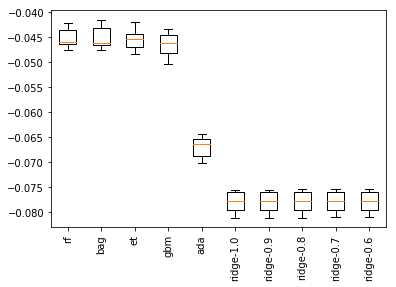

In [9]:
# summarize results
h.summarize_results(results)

The Random Forest Regressor and Bagging regressor are the best models that have the lowest MSE (highest negative MSE). However Random Forest has lower IQR (Interquantile Range). Therefore Random Forest Regressor is choosen as the main model for this data.

#### 5.2.2 The Selected  Model - Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor

seed=42
np.random.seed(seed)
estimators = [('standardize', StandardScaler()),
             ('reg', MultiOutputRegressor(RandomForestRegressor(random_state=seed)))]

pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_validate(pipeline, X_train, y_train, cv=kfold, scoring=['r2','neg_mean_squared_error'])

r2_arr = results['test_r2']
mse_arr = results['test_neg_mean_squared_error']*-1

print(f"R^2: {r2_arr.mean():.4f} with stdev {r2_arr.std():.4f}")
print(f"MSE: {mse_arr.mean():.4f} with stdev {mse_arr.std():.4f}")

R^2: 0.7573 with stdev 0.0103
MSE: 0.0484 with stdev 0.0019


#### 5.2.3 Remove Scaler for easier to interprate the model as Random Forest is not sensitive to scaling process.

In [21]:
from sklearn.ensemble import RandomForestRegressor

seed=42
np.random.seed(seed)

rf = MultiOutputRegressor(RandomForestRegressor(random_state=seed))

kfold = KFold(n_splits=10, random_state=seed)
results = cross_validate(rf, X_train, y_train, cv=kfold, scoring=['r2','neg_mean_squared_error'])

r2_arr = results['test_r2']
mse_arr = results['test_neg_mean_squared_error']*-1

print(f"R^2: {r2_arr.mean():.4f} with stdev {r2_arr.std():.4f}")
print(f"MSE: {mse_arr.mean():.4f} with stdev {mse_arr.std():.4f}")

R^2: 0.7574 with stdev 0.0101
MSE: 0.0484 with stdev 0.0019


The The model performance without scaler is equivalent.

#### 5.2.4 Parameters tuning

In [24]:
""" Model Tuning """

# Import 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Initialize the classifier
seed=42
np.random.seed(seed)

reg = MultiOutputRegressor(RandomForestRegressor(random_state=seed))


#kfold = KFold(n_splits=5, random_state=seed)

#Create the parameters list to tune

parameters = {'estimator__n_estimators':[50, 75,100,200,300, 500], 
              'estimator__max_depth' : [2,3,5,8,10, None],
              'estimator__min_samples_split' : [2,5,7,9,12],
              'estimator__min_samples_leaf' : [1,3,5,7,9]
             }


# Perform grid search 
grid_obj = RandomizedSearchCV(reg, param_distributions=parameters,n_iter = 50,scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)

# Fit the grid search object to the training data 
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_reg = grid_fit.best_estimator_



Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 13.6min finished


In [25]:
print('Tuned Model')
print('R^2 score : ', best_reg.score(X_test, y_test))
print('MSE : ', mean_squared_error(y_test, best_reg.predict(X_test)))

Tuned Model
R^2 score :  0.7848040157220697
MSE :  0.04348968238012815


In [74]:
best_reg

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=9,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
           n_jobs=None)

In [27]:
h.save(best_reg, 'sav/best_reg.sav')

## 6. Evaluation

### 6.1 Model Performance Summary

|     Metric     | Linear Regression | Base RF         | Tuned RF       |
| :------------: | :---------------: | :-------------: |:-------------: | 
| R2             |     0.6099        |   0.7574        | 0.7848         |
| MSE            |      0.0783       |   0.0484        | 0.0435         |

The tuned model is signifantly better than Linear Regression and better than the base random forest regressor.

### 6.2 Feature Importances

#### 6.2.1 BOGO Offer Completed Rate

In [32]:
""" 
Feature Permutation Importance using eli5 
https://eli5.readthedocs.io/en/latest/
"""

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(best_reg.estimators_[0], random_state=1).fit(X_test, y_test.iloc[:,0])
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [58]:
"""
Partial Dependence Plot with  PDPbox
https://pdpbox.readthedocs.io/en/latest/
"""
from pdpbox import pdp, get_dataset, info_plots

def plot_pdp(model, X, feature, title):
    """
    INPUT : 
        model : fittet model sklearn object
        X : features df
        feature : feature name to plot, str
        title : title for the plot
        
    RETURN : None, just to plot the pdp given the feature
    """
    
    feature_names = X.columns.tolist()
    
    # Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=model, dataset=X, model_features=feature_names, feature=feature)

    # plot it
    f, ax = pdp.pdp_plot(pdp_goals, feature)
    ax['pdp_ax'].set_xlabel(feature,size=15)
    ax['pdp_ax'].set_title(title)

    # save it
    #f.savefig("graph/best"+feature+".png", bbox_inches='tight')

    
    return ax['pdp_ax']

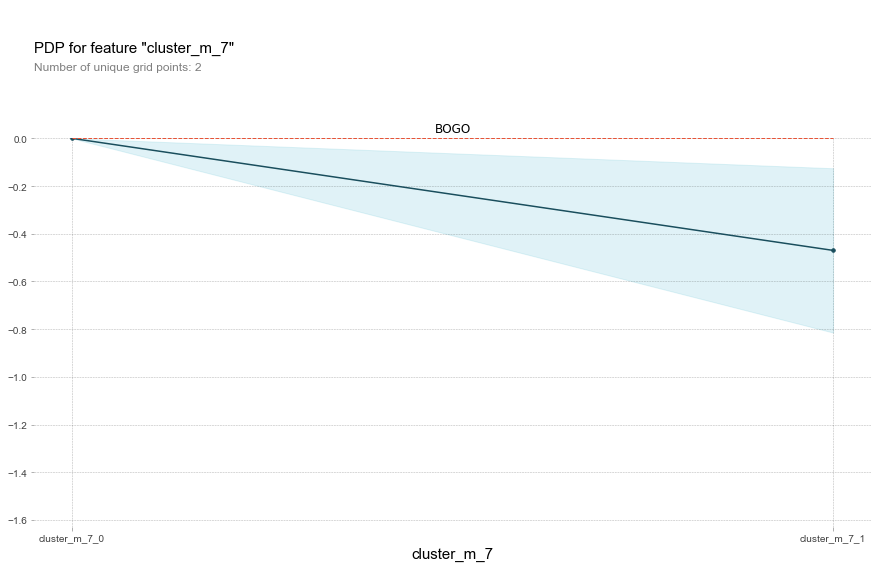

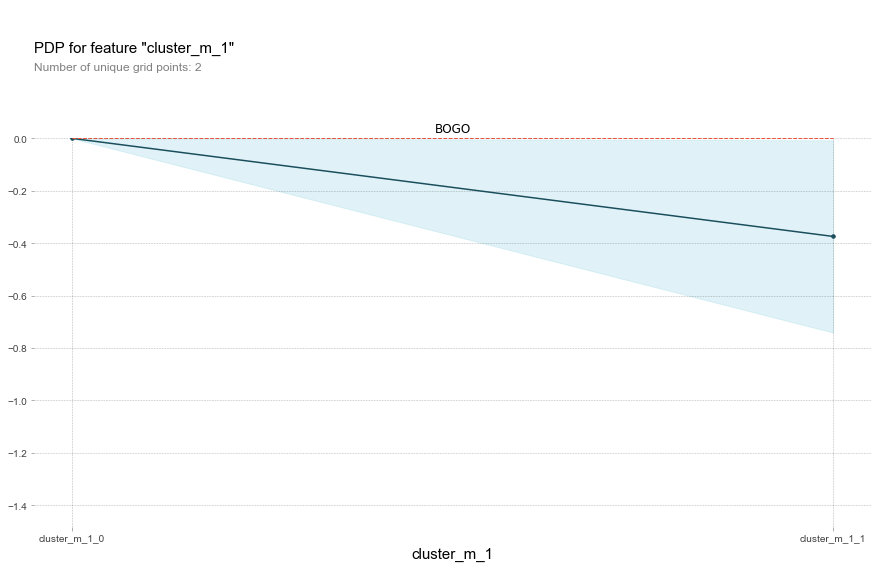

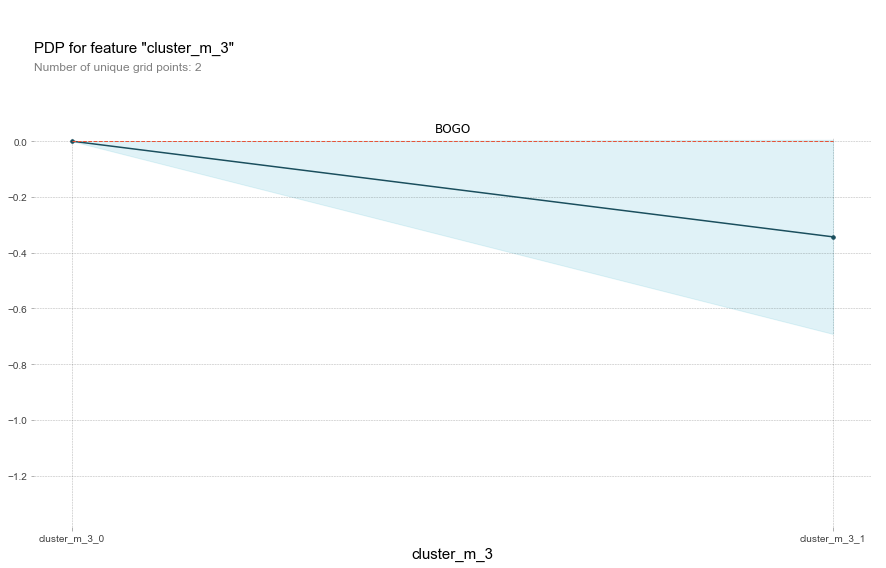

In [44]:
features = ['cluster_m_7', 'cluster_m_1', 'cluster_m_3']
bogo_model = best_reg.estimators_[0]

for feature in features :
    plot_pdp(bogo_model, X_test, feature,'BOGO')

Cluster 1,3, and 7 in MAIN Profile are the people who are very not responsive to BOGO offer. So if a customer is in those clusters, he will have lower offer completed rate for BOGO.

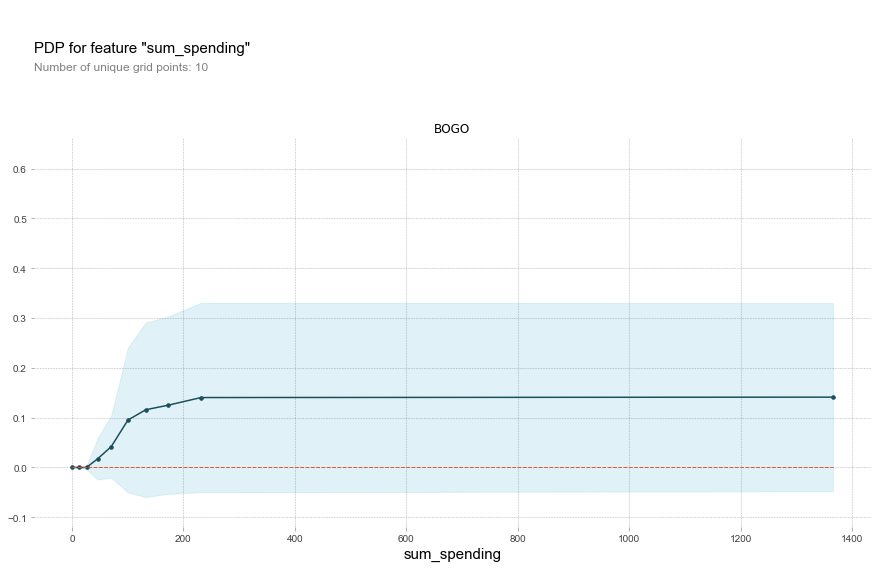

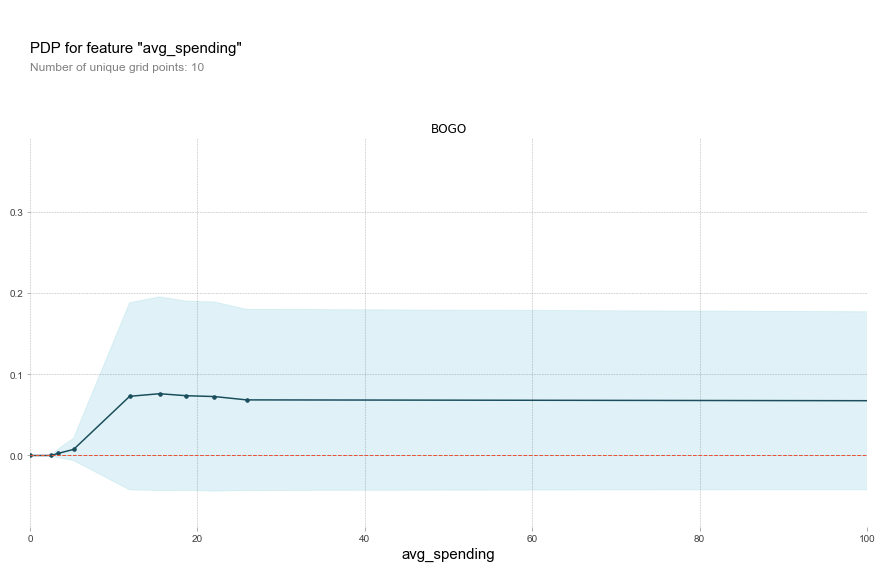

In [61]:
"""sum_spending"""
plot_pdp(bogo_model, X_test, 'sum_spending','BOGO')

"""avg_spending"""
ax = plot_pdp(bogo_model, X_test, 'avg_spending','BOGO')
ax.set_xlim([0,100]);

Based on this graph, we see that increasing number of total spending & avg_spending increases the chances of higher offer completed rate but have little impact when it is more than ~200 dollars and ~ 12 dollars. This is the case when customers become regulars.

#### 6.3.2 DISCOUNT

In [33]:
""" Feature Permutation Importance """
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(best_reg.estimators_[1], random_state=1).fit(X_test, y_test.iloc[:,0])
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

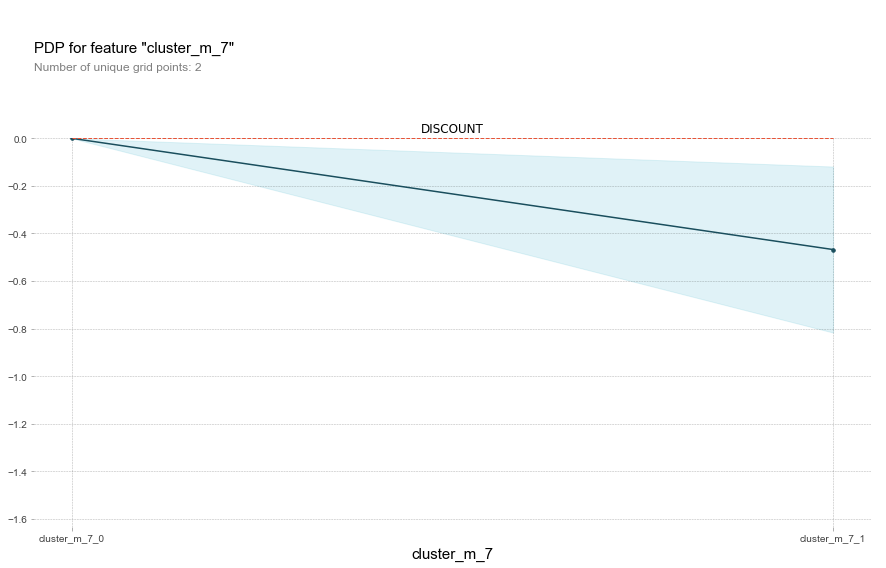

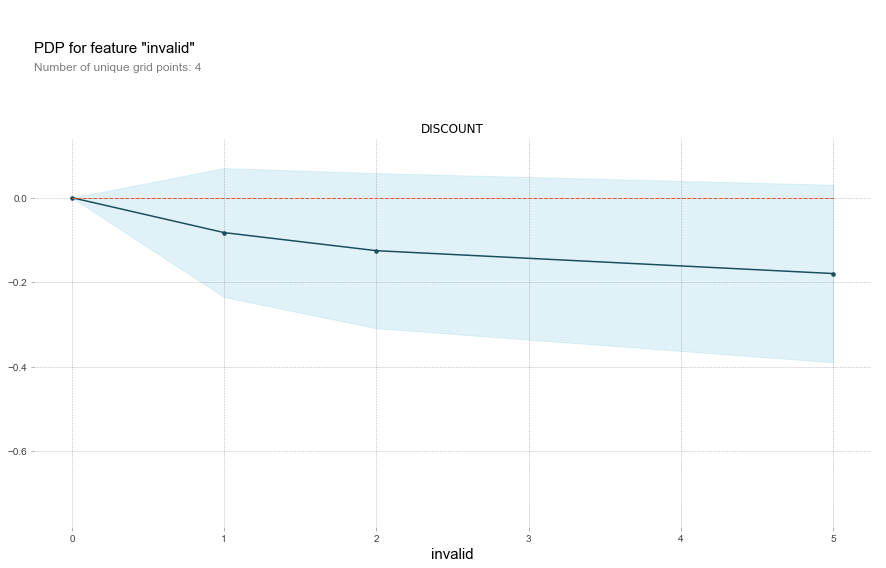

In [64]:
features = ['cluster_m_7', 'invalid']
discount_model = best_reg.estimators_[1]

for feature in features :
    plot_pdp(discount_model, X_test, feature,'DISCOUNT')

Increasing Both features, `cluster_m_7` and `invalid` decreases the lower offered rate of discount. Cluster m_7 is not a very responsive for both both Bogo and Discount offer. While increasing number of invalid transactions means they are regulars and make purchasing even there is no offer.

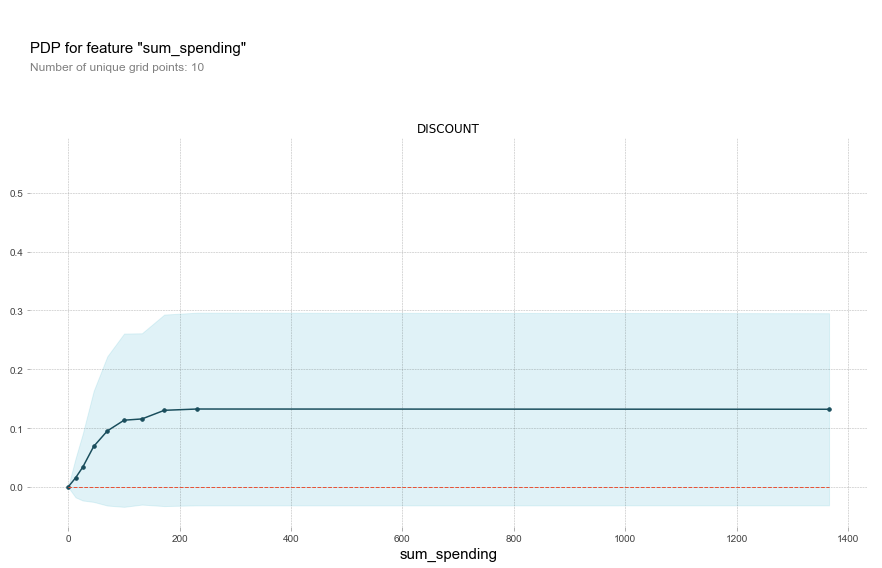

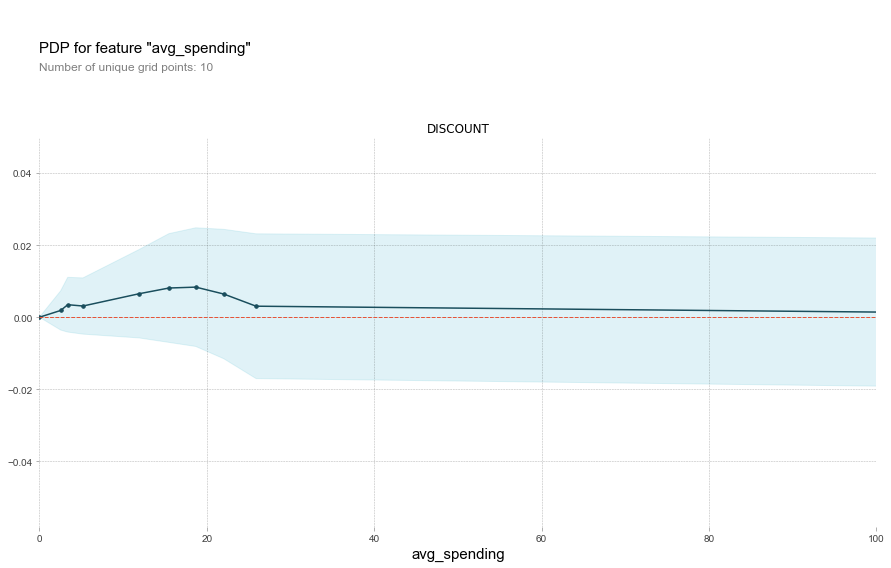

In [67]:
"""sum_spending"""
plot_pdp(discount_model, X_test, 'sum_spending','DISCOUNT')

"""avg_spending"""
ax = plot_pdp(discount_model, X_test, 'avg_spending','DISCOUNT')
ax.set_xlim([0,100]);

Based on above graph, we see that increasing number of total spending & avg_spending increases the chances of higher offer completed rate. However  for sum_spending, it will have little impact when it is more than ~180 dollars. And for `avg_spending` it will decrease the prediction impact  when more than ~18 dollars.

#### 6.3.3 INFORMATIONAL

In [34]:
""" Feature Permutation Importance """
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(best_reg.estimators_[2], random_state=1).fit(X_test, y_test.iloc[:,0])
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

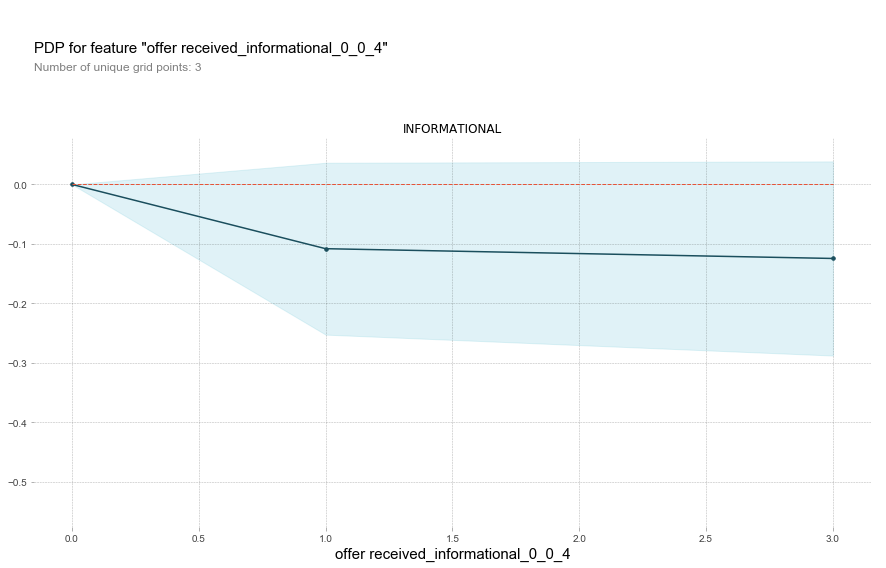

In [69]:
info_model = best_reg.estimators_[2]

"""sum_spending"""
plot_pdp(info_model, X_test, 'offer received_informational_0_0_4','INFORMATIONAL')



Increasing offer informational sent to all customers, decrease the viewed rate. This is the case when we need to be selective enough when sending informational offer to improved the viewed rate and engagement.

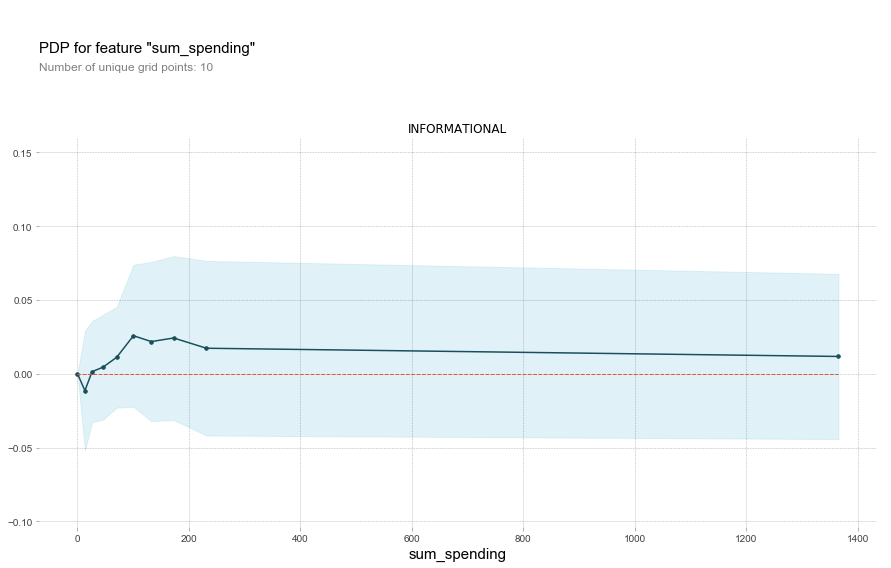

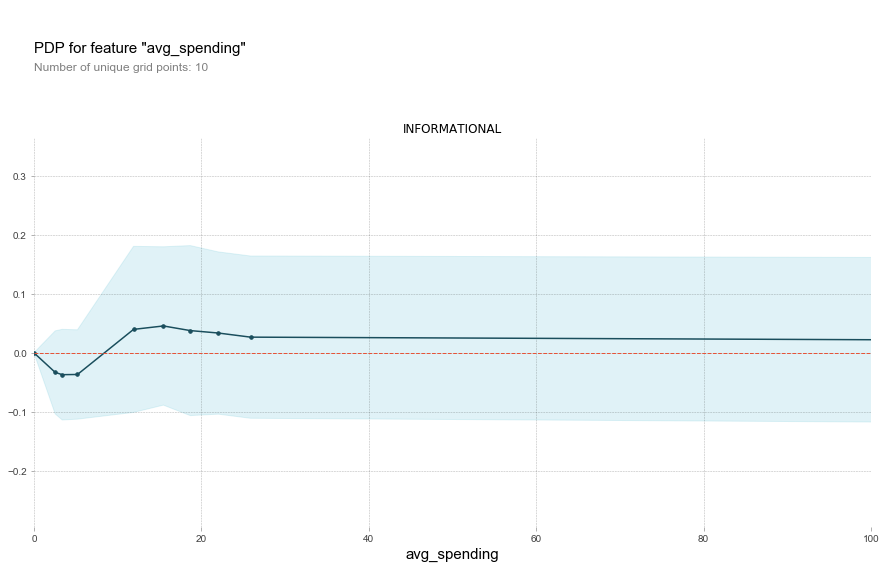

In [73]:
"""sum_spending"""
plot_pdp(info_model, X_test, 'sum_spending','INFORMATIONAL')
ax.set_xlim([0,100]);
"""avg_spending"""
ax = plot_pdp(info_model, X_test, 'avg_spending','INFORMATIONAL')
ax.set_xlim([0,100]);

The customers who have total spending (`sum_spending`) less than ~ 20 dollars are likely to have lower viewed rate. But increases when higher than ~ 20 dollars, until 100 dollars, beyond that it has little impact.

It is similar with `avg_spending`, lower viewed rates is likely when the `avg_spending` is less than ~7 dollars, and higher when more than ~7  up to ~12 dollars, beyond that it has little impact or may decreases the viewed rate. 

## 7. Conclusion

### Model Performance

|     Metric     | Linear Regression | Base RF         | Tuned RF       |
| :------------: | :---------------: | :-------------: |:-------------: | 
| R2             |     0.6099        |   0.7574        | 0.7848         |
| MSE            |      0.0783       |   0.0484        | 0.0435         |

### Summary

Increasing number of total spending & avg_spending increases the chances of higher offer completed rate for bogo and discount but have little impact when it achieved certain threshold. The threshold may indicated when the customers became regulars, they purchase even without offer anyway.

Like in part 2, Cluster 7 in MAIN profile is the cluster who are not very responsive to both offer, bogo and discount, and become a good parameter to predict a  lower offer completed rate.

Given more informational offer did not guarantee the higher viewed rate, instead it caused lower viewed rate. So, we may need to be selective when sending informational offer in order to improve their engagement. Part 2 provided the targeted cluster for informational offer.


### Reflection 
An unsupervised machine learning can really help us to identify and understand more about customers. Using this knowledge, we can make a better prediction about offer completed rate, how likely they are to response to the offer.

While developing model, I find it difficulty to choose the suitable algorithm in supervise machine learning. By using an available pipeline to spot check the algorithm, I can quickly screen the better model. Then start improving the model from there.

Using the feature importance in the improved model, I can have a better understanding about customers behaviour, adding a valuable information about their demographic.


### Improvement

The suggestion for improvement is to develop a pipeline model supervised machine learning to predict their cluster thru classifier then to predict their offer completed rate thru regression. A model can utilize the available neural networks technology. Advanced feature engineering can also be applied for improvement. 


### References
https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/